In [9]:
# !pip list
import numpy as np
from  sklearn import tree
#
# clf = tree.DecisionTreeClassifier()
# clf = clf(x_train, y_train)
#
# result = clf.score(x_test, y_test)

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from pandas import DataFrame as df

In [10]:
wine = load_wine()


In [14]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
x = wine.data
y = wine.target


In [15]:
import pandas as pd
data = pd.concat( [df(x),df(y)], axis=1)
data.columns = wine.feature_names + ['target']

In [17]:
data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(wine.data,wine.target, test_size=0.3)


In [54]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=10
                                  ,min_samples_split=10
                                  )
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test,Y_test)

score

0.9259259259259259

In [50]:
import graphviz

In [61]:
%matplotlib inline
feature_name = wine.feature_names

dot_data = tree.export_graphviz(clf,
                                feature_names=feature_name,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True,
                                )
# graph = graphviz.Source(dot_data)
# graph

In [62]:
graph = graphviz.Source(dot_data)
# graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [63]:
import numpy as np
data = sorted([*zip(feature_name,clf.feature_importances_)],key=lambda x:x[1],reverse=True)
data

[('flavanoids', 0.5130939331736645),
 ('proline', 0.2674453947652687),
 ('od280/od315_of_diluted_wines', 0.1647048692965321),
 ('magnesium', 0.028300118917351375),
 ('alcohol', 0.026455683847183224),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('total_phenols', 0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.0)]

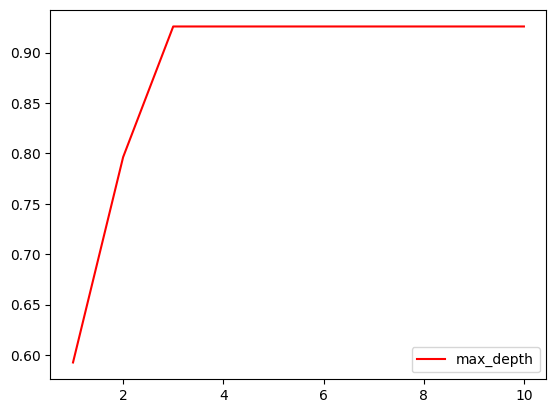

In [59]:
# 剪枝策略
# max_depth
# min_samples_leaf & min_samples_split

import matplotlib.pyplot as plt

test = []

for i in range(1,11):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=i
                                  ,min_samples_leaf=10
                                  ,min_samples_split=10
                                  )
    clf = clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)
    test.append(score)

plt.plot(range(1,11),test,color='red',label="max_depth")
plt.legend()
plt.show()

In [60]:
clf.predict(X_test)


array([0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 0])